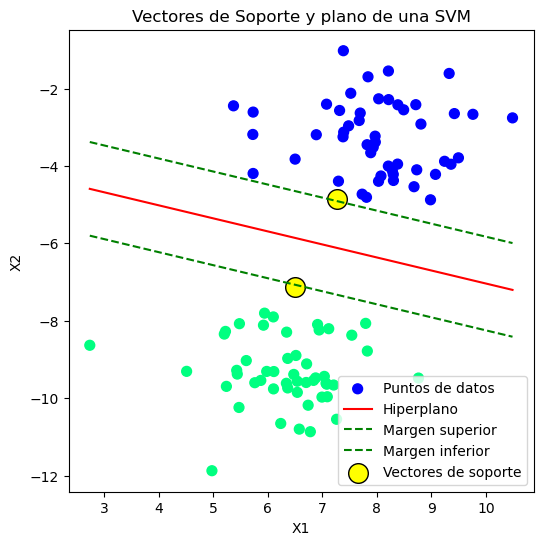

In [1]:
# ==========================================================
# Maestría en Ciencia y Análisis de Datos
# Universidad Mayor de San Andrés
# ----------------------------------------------------------
#           Machine Learning y Deep Learning
# ----------------------------------------------------------
#        Rolando Gonzales Martinez, Agosto 2024
# ==========================================================
#            Maquinas de soporte vectorial
# ==========================================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs

# Crear un dataset simple para clasificación binaria
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# Crear el modelo de SVM lineal
clf = SVC(kernel='linear')
clf.fit(X, y)

# Obtener el vector de pesos (coeficientes) y el intercepto
w = clf.coef_[0]
b = clf.intercept_[0]

# Crear el hiperplano
x_plot = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_plot = -(w[0] * x_plot + b) / w[1]

# Obtener los vectores de soporte
support_vectors = clf.support_vectors_

# Margen
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
y_margin_up = y_plot + margin
y_margin_down = y_plot - margin


plt.figure(figsize=(6, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter', label='Puntos de datos')

# Hiperplano y márgenes
plt.plot(x_plot, y_plot, 'r-', label='Hiperplano')
plt.plot(x_plot, y_margin_up, 'g--', label='Margen superior')
plt.plot(x_plot, y_margin_down, 'g--', label='Margen inferior')

plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='yellow', edgecolors='black', label='Vectores de soporte')

plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Vectores de Soporte y plano de una SVM')
plt.show()


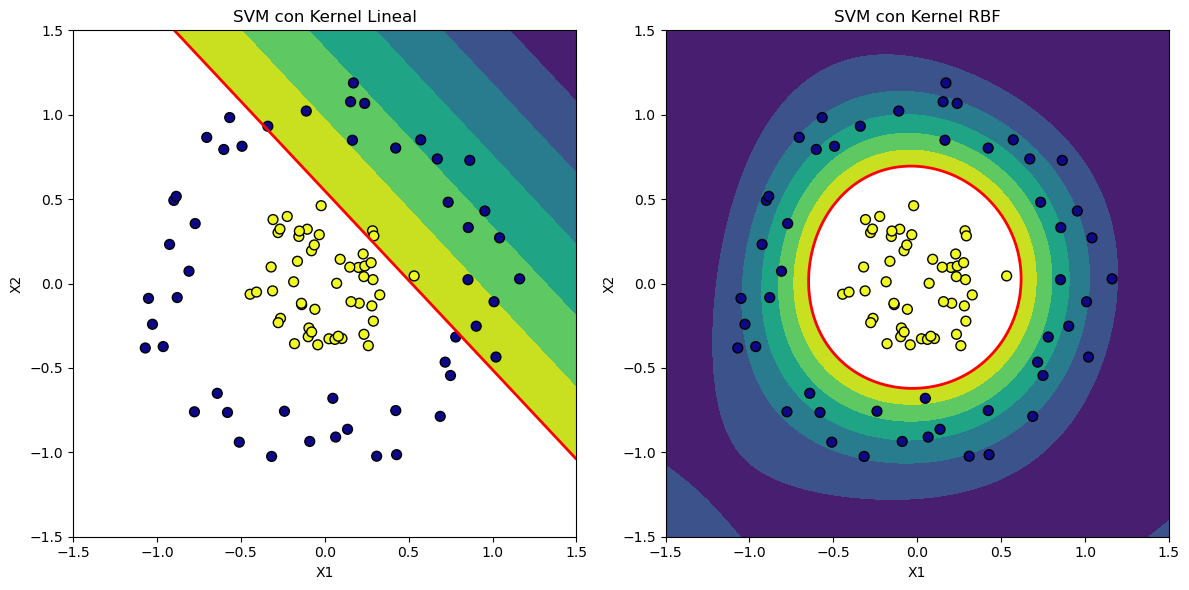

In [3]:
# Crear un conjunto de datos no linealmente separable
X, y = make_circles(n_samples=100, factor=0.3, noise=0.1)

# Crear un modelo SVM con kernel lineal
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y)

# Crear un modelo SVM con kernel RBF (trick del kernel)
svm_rbf = SVC(kernel='rbf', gamma=1)
svm_rbf.fit(X, y)

# Crear una malla para graficar las fronteras de decisión
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 500), np.linspace(-1.5, 1.5, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predicciones
Z_linear = svm_linear.decision_function(grid).reshape(xx.shape)
Z_rbf = svm_rbf.decision_function(grid).reshape(xx.shape)

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Subplot para SVM con kernel lineal
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_linear, levels=np.linspace(Z_linear.min(), 0, 7), cmap=plt.cm.viridis)
plt.contour(xx, yy, Z_linear, levels=[0], linewidths=2, colors='red')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.plasma, s=50, edgecolors='black')
plt.title("SVM con Kernel Lineal")
plt.xlabel("X1")
plt.ylabel("X2")

# Subplot para SVM con kernel RBF
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_rbf, levels=np.linspace(Z_rbf.min(), 0, 7), cmap=plt.cm.viridis)
plt.contour(xx, yy, Z_rbf, levels=[0], linewidths=2, colors='red')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.plasma, s=50, edgecolors='black')
plt.title("SVM con Kernel RBF")
plt.xlabel("X1")
plt.ylabel("X2")

plt.tight_layout()
plt.show()

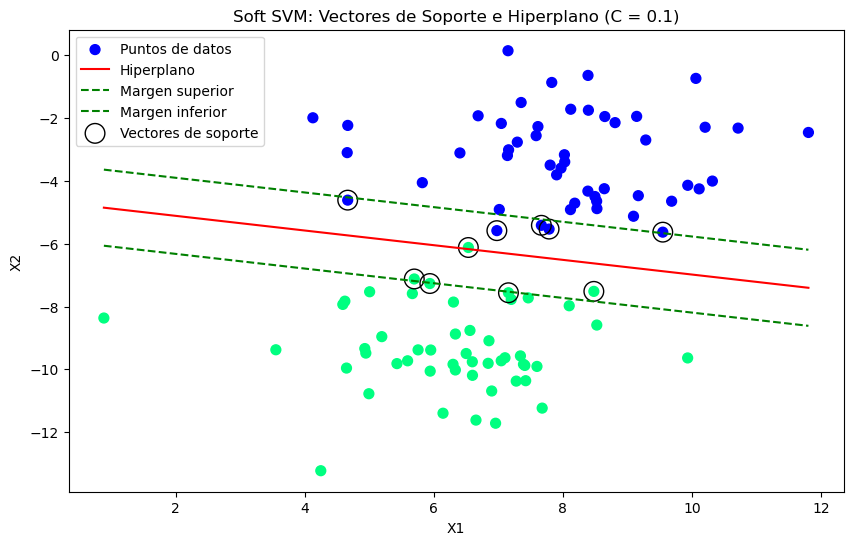

In [5]:
# Crear un conjunto de datos con un poco de superposición entre clases
X, y = make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.5)

# Crear un modelo SVM con margen suave (Soft SVM)
C_value = 0.1
soft_svm = SVC(kernel='linear', C=C_value)
soft_svm.fit(X, y)
# El parámetro 𝐶 controla el trade-off entre maximizar el margen y minimizar 
# los errores de clasificación en el conjunto de entrenamiento

# Extraer los vectores de soporte y el hiperplano
support_vectors = soft_svm.support_vectors_
w = soft_svm.coef_[0]
b = soft_svm.intercept_[0]

# Crear el hiperplano
x_plot = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_plot = -(w[0] * x_plot + b) / w[1]

# Crear los márgenes
margin = 1 / np.sqrt(np.sum(w**2))
y_margin_up = y_plot + margin
y_margin_down = y_plot - margin

# Cambiar colores del gráfico para mayor contraste y claridad
plt.figure(figsize=(10, 6))

# Colores personalizados para las dos clases
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter', label='Puntos de datos')

# Hiperplano y márgenes
plt.plot(x_plot, y_plot, 'r-', label='Hiperplano')
plt.plot(x_plot, y_margin_up, 'g--', label='Margen superior')
plt.plot(x_plot, y_margin_down, 'g--', label='Margen inferior')

# Resaltar los vectores de soporte con otro color
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='black', label='Vectores de soporte')

plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f'Soft SVM: Vectores de Soporte e Hiperplano (C = {C_value})')
plt.show()


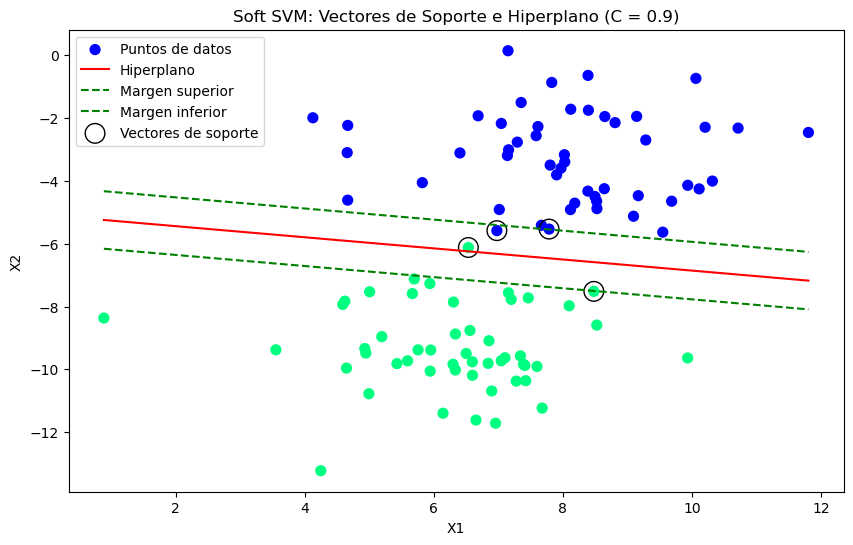

In [7]:
# Crear un conjunto de datos con un poco de superposición entre clases
X, y = make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.5)

# Crear un modelo SVM con margen suave (Soft SVM)
C_value = 0.9
soft_svm = SVC(kernel='linear', C=C_value)
soft_svm.fit(X, y)

# Extraer los vectores de soporte y el hiperplano
support_vectors = soft_svm.support_vectors_
w = soft_svm.coef_[0]
b = soft_svm.intercept_[0]

# Crear el hiperplano
x_plot = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_plot = -(w[0] * x_plot + b) / w[1]

# Crear los márgenes
margin = 1 / np.sqrt(np.sum(w**2))
y_margin_up = y_plot + margin
y_margin_down = y_plot - margin

# Cambiar colores del gráfico para mayor contraste y claridad
plt.figure(figsize=(10, 6))

# Colores personalizados para las dos clases
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter', label='Puntos de datos')

# Hiperplano y márgenes
plt.plot(x_plot, y_plot, 'r-', label='Hiperplano')
plt.plot(x_plot, y_margin_up, 'g--', label='Margen superior')
plt.plot(x_plot, y_margin_down, 'g--', label='Margen inferior')

# Resaltar los vectores de soporte con otro color
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='black', label='Vectores de soporte')

plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f'Soft SVM: Vectores de Soporte e Hiperplano (C = {C_value})')
plt.show()